# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

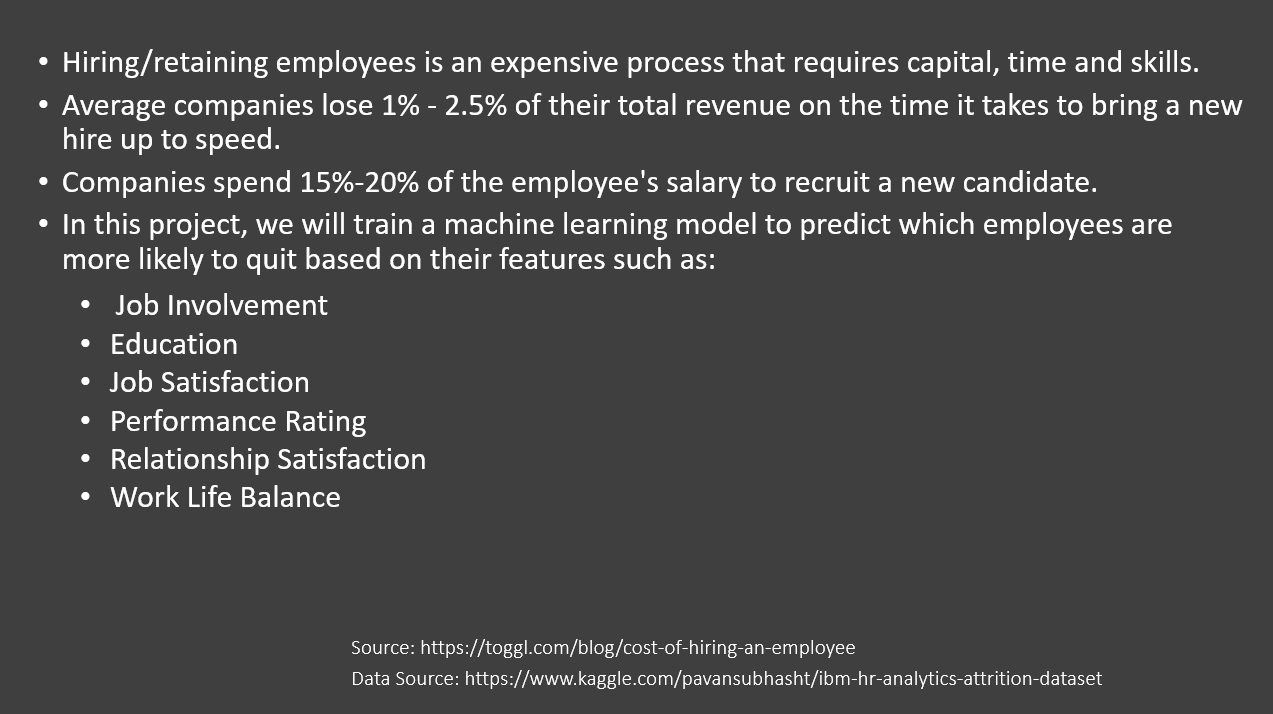

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [2]:
# You have to include the full link to the csv file containing your dataset
employee_df = pd.read_csv('employee_data.csv')
employee_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [3]:
employee_df['Attrition'].values

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [4]:
# 35 features in total, each contains 1470 data points
# No missing elements are present in the dataset
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**MINI CHALLENGE #1:**
- **Use any Pandas method to obtain a statistical summary of the data**
- **What is the mean, maximum and minimum employee age considered in this study?**

In [5]:
print(employee_df.describe().transpose())

                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.

# TASK #3: PERFORM DATA VISUALIZATION (PART #1)

In [6]:
# Let's replace the 'Attritition', 'overtime', and 'Over18' column with integers before performing any visualizations 
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x=='Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x=='Y' else 0)

In [7]:
# Let's make sure that the replacement worked!
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
0        19479                   8       1         1                 11   
1        24907                   1       1         0                 23   
2         2396                   6       1         1                 15   
3        23159                   1       1         1                 11   
4        16632                   9       1         0                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

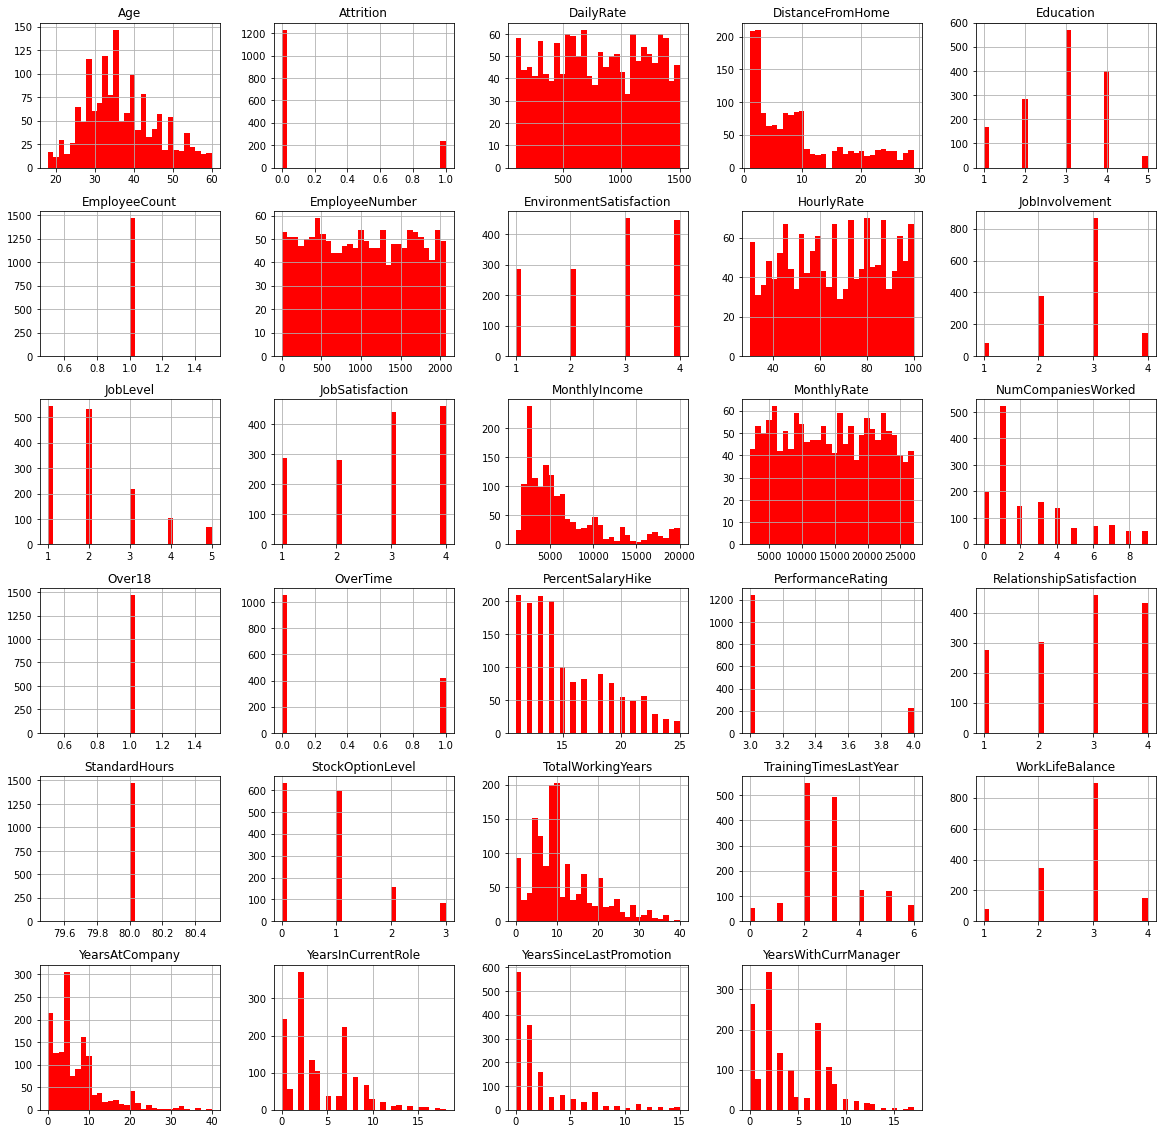

In [8]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours', 'over 18' and 'employee number' since they do not change from one employee to the other
employee_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [9]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [10]:
# Let's see how many employees left the company! 
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [11]:
# View employees who stayed
stayed_df

Age  Attrition     BusinessTravel  DailyRate              Department  \
1      49          0  Travel_Frequently        279  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
5      32          0  Travel_Frequently       1005  Research & Development   
6      59          0      Travel_Rarely       1324  Research & Development   
7      30          0      Travel_Rarely       1358  Research & Development   
8      38          0  Travel_Frequently        216  Research & Development   
9      36          0      Travel_Rarely       1299  Research & Development   
10     35          0      Travel_Rarely        809  Research & Development   
11     29          0      Travel_Rarely        153  Research & Development   
12     31          0      Travel_Rarely        670  Research & Development   
13     34          0      Travel_Rarely       1346  Research & Development   
15     29          0      Travel_Rarely       1389  Research & Development   
16     32          0      Travel_Rarely        334  Research & Development   
17     22          0         Non-Travel       1123  Research & Development   
18     53          0      Travel_Rarely       1219                   Sales   
19     38          0      Travel_Rarely        371  Research & Development   
20     24          0         Non-Travel        673  Research & Development   
22     34          0      Travel_Rarely        419  Research & Development   
23     21          0      Travel_Rarely        391  Research & Development   
25     53          0      Travel_Rarely       1282  Research & Development   
27     42          0      Travel_Rarely        691                   Sales   
28     44          0      Travel_Rarely        477  Research & Development   
29     46          0      Travel_Rarely        705                   Sales   
30     33          0      Travel_Rarely        924  Research & Development   
31     44          0      Travel_Rarely       1459  Research & Development   
32     30          0      Travel_Rarely        125  Research & Development   
35     43          0      Travel_Rarely       1273  Research & Development   
37     35          0      Travel_Rarely        890                   Sales   
38     36          0      Travel_Rarely        852  Research & Development   
39     33          0  Travel_Frequently       1141                   Sales   
40     35          0      Travel_Rarely        464  Research & Development   
41     27          0      Travel_Rarely       1240  Research & Development   
43     27          0  Travel_Frequently        994                   Sales   
44     30          0  Travel_Frequently        721  Research & Development   
46     34          0         Non-Travel       1065                   Sales   
47     37          0      Travel_Rarely        408  Research & Development   
48     46          0  Travel_Frequently       1211                   Sales   
49     35          0      Travel_Rarely       1229  Research & Development   
52     44          0      Travel_Rarely       1488                   Sales   
53     35          0         Non-Travel       1097  Research & Development   
54     26          0      Travel_Rarely       1443                   Sales   
55     33          0  Travel_Frequently        515  Research & Development   
56     35          0  Travel_Frequently        853                   Sales   
57     35          0      Travel_Rarely       1142  Research & Development   
58     31          0      Travel_Rarely        655  Research & Development   
59     37          0      Travel_Rarely       1115  Research & Development   
60     32          0      Travel_Rarely        427  Research & Development   
61     38          0  Travel_Frequently        653  Research & Development   
62     50          0      Travel_Rarely        989  Research & Development   
63     59          0      Tr

In [12]:
# View employees who left
left_df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
2      37          1      Travel_Rarely       1373  Research & Development   
14     28          1      Travel_Rarely        103  Research & Development   
21     36          1      Travel_Rarely       1218                   Sales   
24     34          1      Travel_Rarely        699  Research & Development   
26     32          1  Travel_Frequently       1125  Research & Development   
33     39          1      Travel_Rarely        895                   Sales   
34     24          1      Travel_Rarely        813  Research & Development   
36     50          1      Travel_Rarely        869                   Sales   
42     26          1      Travel_Rarely       1357  Research & Development   
45     41          1      Travel_Rarely       1360  Research & Development   
50     48          1      Travel_Rarely        626  Research & Development   
51     28          1      Travel_Rarely       1434  Research & Development   
69     36          1      Travel_Rarely        318  Research & Development   
89     46          1      Travel_Rarely        669                   Sales   
100    37          1      Travel_Rarely        807         Human Resources   
102    20          1  Travel_Frequently        871  Research & Development   
107    25          1      Travel_Rarely        240                   Sales   
111    34          1  Travel_Frequently        658  Research & Development   
122    56          1      Travel_Rarely        441  Research & Development   
124    31          1      Travel_Rarely        249                   Sales   
126    58          1      Travel_Rarely        147  Research & Development   
127    19          1      Travel_Rarely        528                   Sales   
132    31          1      Travel_Rarely        542                   Sales   
136    51          1  Travel_Frequently       1150  Research & Development   
140    32          1      Travel_Rarely       1033  Research & Development   
171    19          1  Travel_Frequently        602                   Sales   
177    19          1      Travel_Rarely        303  Research & Development   
182    41          1      Travel_Rarely       1356                   Sales   
192    35          1      Travel_Rarely        556  Research & Development   
204    38          1      Travel_Rarely       1180  Research & Development   
205    29          1      Travel_Rarely        121                   Sales   
210    32          1      Travel_Rarely       1045                   Sales   
214    30          1      Travel_Rarely       1005  Research & Development   
216    30          1  Travel_Frequently        334                   Sales   
217    29          1      Travel_Rarely        992  Research & Development   
229    29          1      Travel_Rarely        896  Research & Development   
234    33          1      Travel_Rarely        813  Research & Development   
236    33          1      Travel_Rarely        465  Research & Development   
239    32          1      Travel_Rarely        515  Research & Development   
250    37          1  Travel_Frequently        504  Research & Development   
259    31          1  Travel_Frequently        307  Research & Development   
264    28          1      Travel_Rarely        529  Research & Development   
271    47          1         Non-Travel        666  Research & Development   
286    44          1  Travel_Frequently        920  Research & Development   
288    26          1      Travel_Rarely       1449  Research & Development   
293    26          1      Travel_Rarely        950                   Sales   
296    18          1      Travel_Rarely        230  Research & Development   
317    52          1      Travel_Rarely        723  Research & Development   
323    28          1      Travel_Rarely       1157  Research & Development   
327    39          1      Tr

In [13]:
left_df.describe()

# Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count       237.000000     237.000000    237.000000          237.000000   
mean          2.468354    4787.092827  14559.308017            2.940928   
std           1.118058    3640.210367   7208.153264            2.678519   
min           1.000000    1009.000000   2326.000000            0.000000   
25%           1.000000    2373.000000   8870.000000            1.000000   
50%           3.000000    3202.000000  14618.000000            1.000000   
75%           3.000000    5916.000000  21081.000000            5.000000   
max           4.000000   19859.000000  26999.000000            9.000000   

         OverTime  PercentSalaryHike  PerformanceRating  \
count  237.000000         237.000000         237.000000   
mean     0.535865          15.097046           3.156118   
std      0.499768           3.770294           0.363735   
min      0.000000          11.000000           3.000000   
25%      0.000000          12.000000           3.000000   
50%      1.000000          14.000000           3.000000   
75%      1.000000          17.000000           3.000000   
max      1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                237.000000        237.000000         237.000000   
mean                   2.599156          0.527426           8.244726   
std                    1.125437          0.856361           7.169204   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           3.000000   
50%                    3.000000          0.000000           7.000000   
75%                    4.000000          1.000000          10.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count             237.000000       237.000000      237.000000   
mean                2.624473         2.658228        5.130802   
std                 1.254784         0.816453        5.949984   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        1.000000   
50%                 2.000000         3.000000        3.000000   
75%                 3.000000         3.000000        7.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count          237.000000               237.000000            237.000000  
mean             2.902954                 1.945148              2.852321  
std

In [14]:
stayed_df.describe()

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1233.000000    1233.000000   1233.000000          1233.00000   
mean          2.778589    6832.739659  14265.779400             2.64558   
std           1.093277    4818.208001   7102.260749             2.46009   
min           1.000000    1051.000000   2094.000000             0.00000   
25%           2.000000    3211.000000   7973.000000             1.00000   
50%           3.000000    5204.000000  14120.000000             2.00000   
75%           4.000000    8834.000000  20364.000000             4.00000   
max           4.000000   19999.000000  26997.000000             9.00000   

          OverTime  PercentSalaryHike  PerformanceRating  \
count  1233.000000        1233.000000        1233.000000   
mean      0.234388          15.231144           3.153285   
std       0.423787           3.639511           0.360408   
min       0.000000          11.000000           3.000000   
25%       0.000000          12.000000           3.000000   
50%       0.000000          14.000000           3.000000   
75%       0.000000          18.000000           3.000000   
max       1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1233.000000       1233.000000        1233.000000   
mean                   2.733982          0.845093          11.862936   
std                    1.071603          0.841985           7.760719   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          16.000000   
max                    4.000000          3.000000          38.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1233.000000      1233.000000     1233.000000   
mean                2.832928         2.781022        7.369019   
std                 1.293585         0.681907        6.096298   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        6.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1233.000000              1233.000000           1233.000000  
mean             4.484185         

**MINI CHALLENGE #2:**
- **Plot the correlation matrix**
- **What do you infer from the data**

<AxesSubplot:>

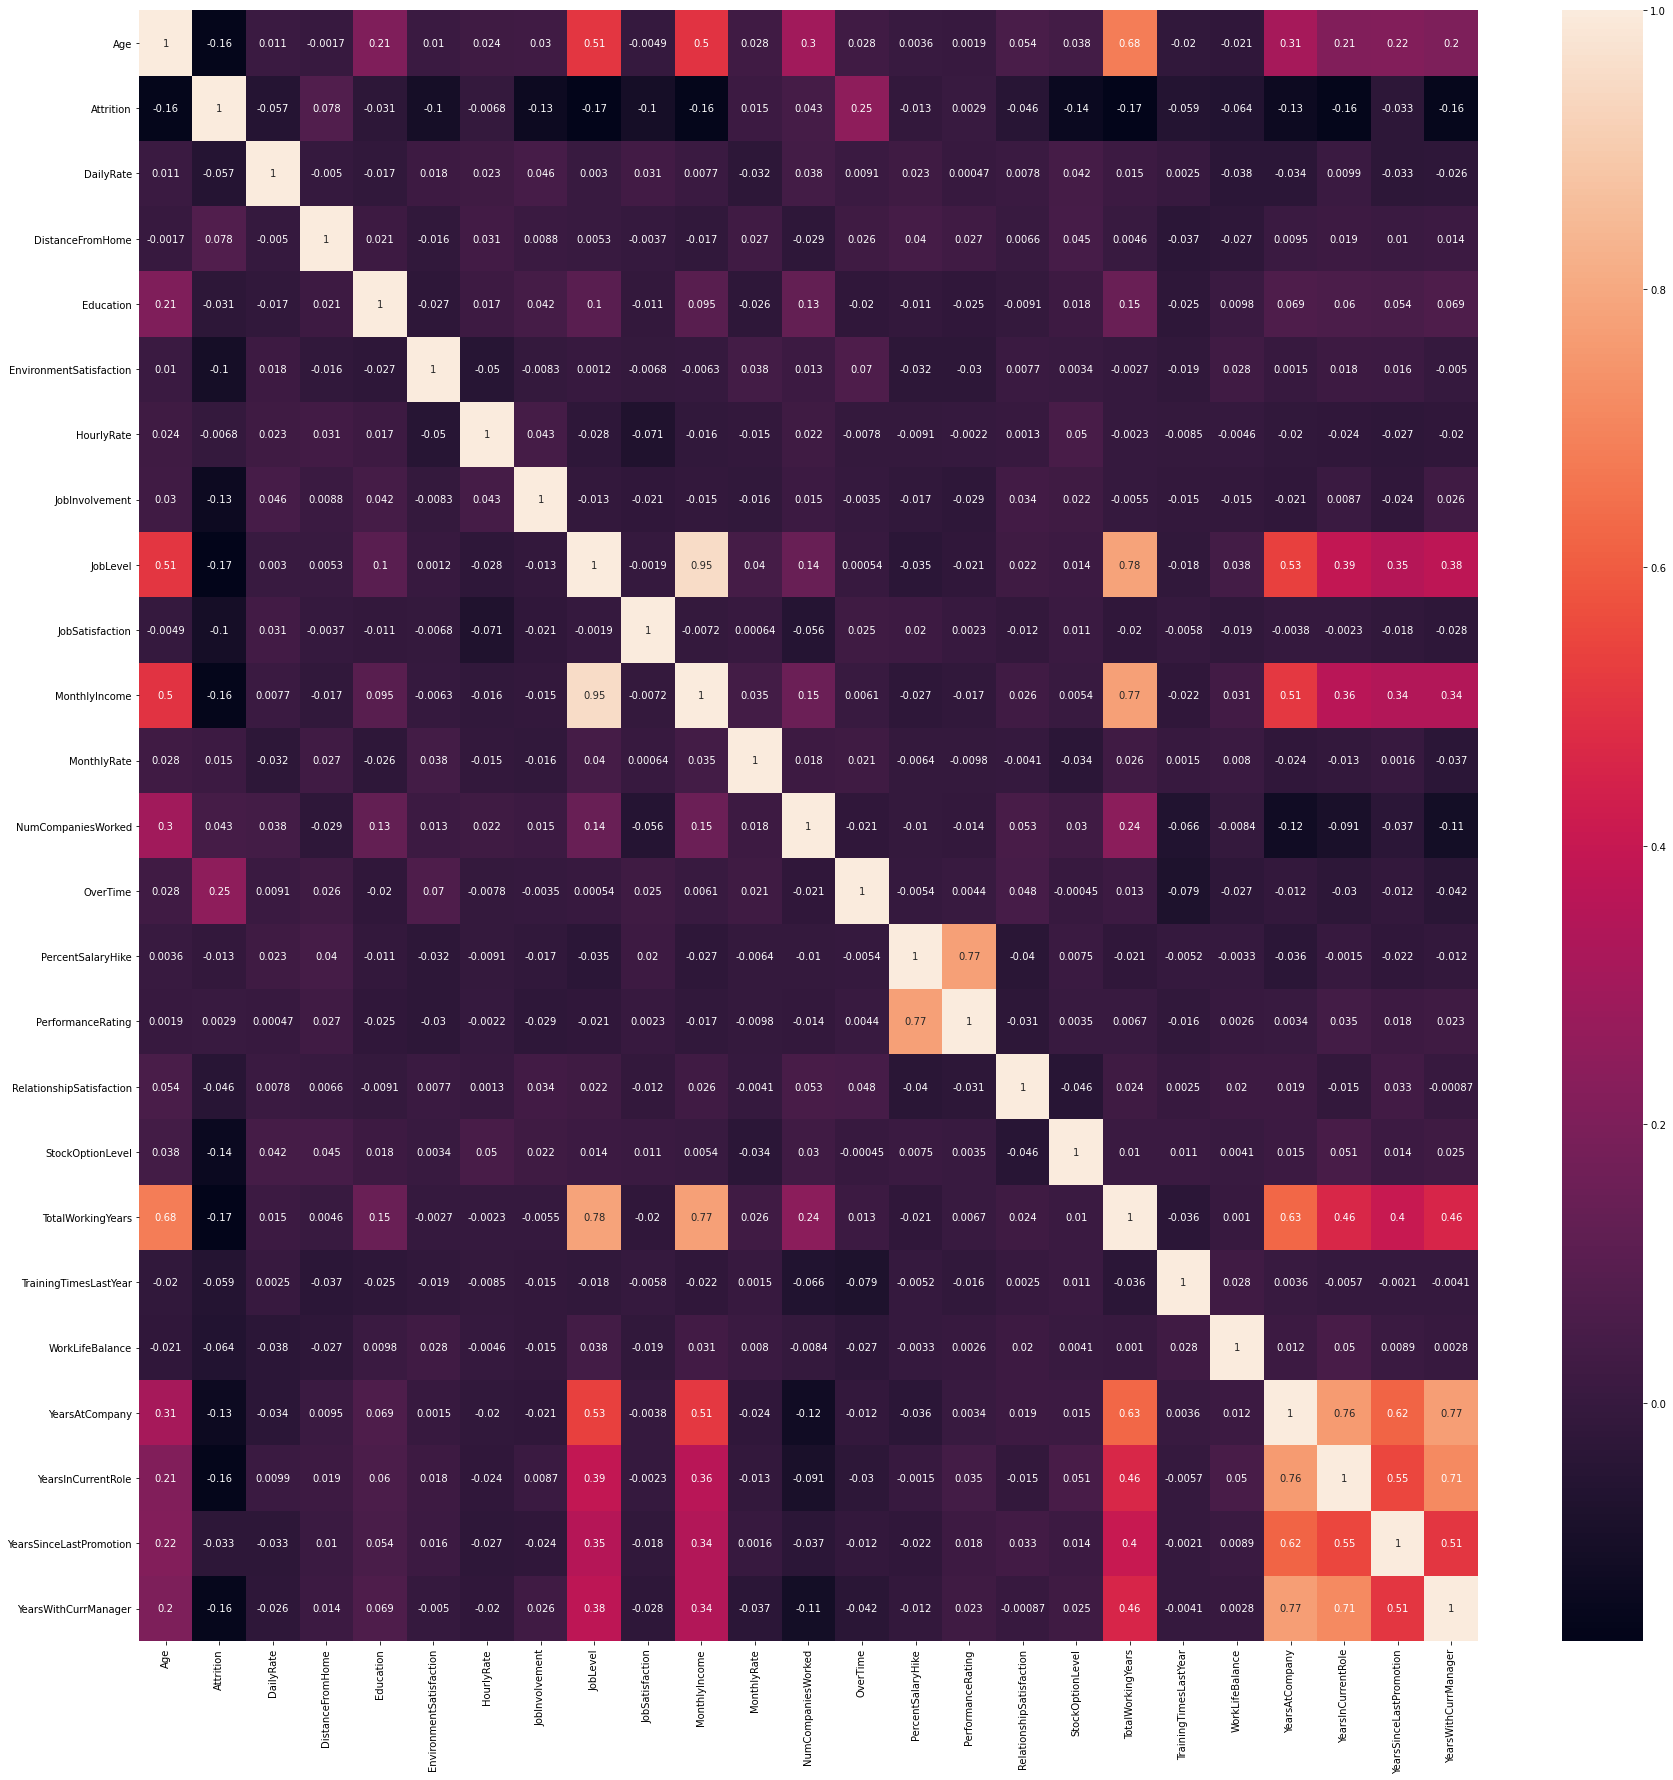

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(employee_df.corr(), annot=True)

# TASK #4: PERFORM DATA VISUALIZATION (PART #2)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

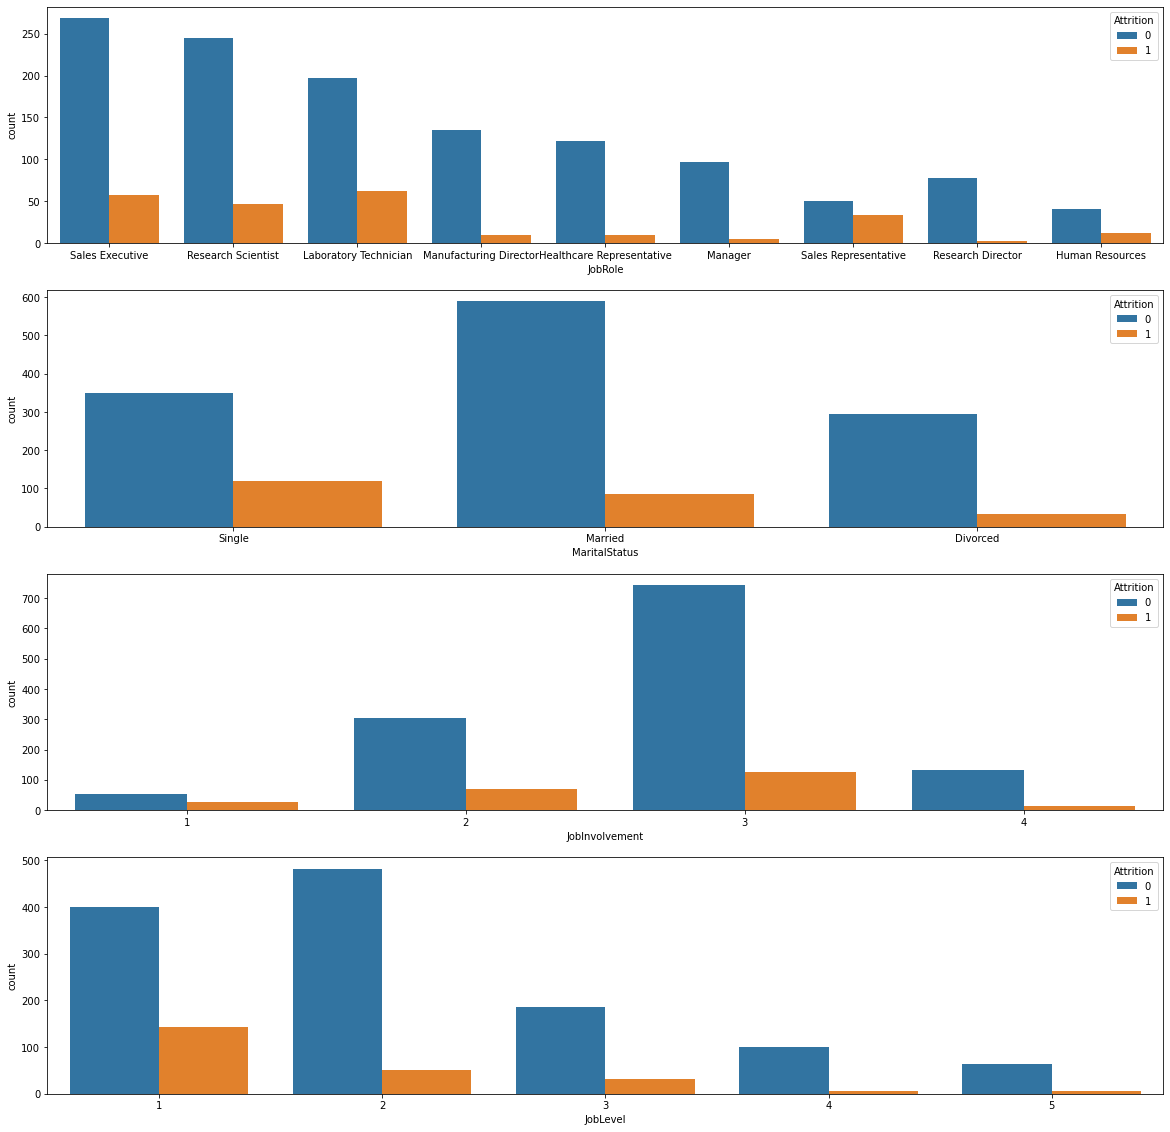

In [16]:
plt.figure(figsize=[20,20])

plt.subplot(411)
sns.countplot(x='JobRole', hue = 'Attrition', data = employee_df)

plt.subplot(412)
sns.countplot(x='MaritalStatus', hue = 'Attrition', data = employee_df)

plt.subplot(413)
sns.countplot(x='JobInvolvement', hue = 'Attrition', data = employee_df)

plt.subplot(414)
sns.countplot(x='JobLevel', hue = 'Attrition', data = employee_df)


# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

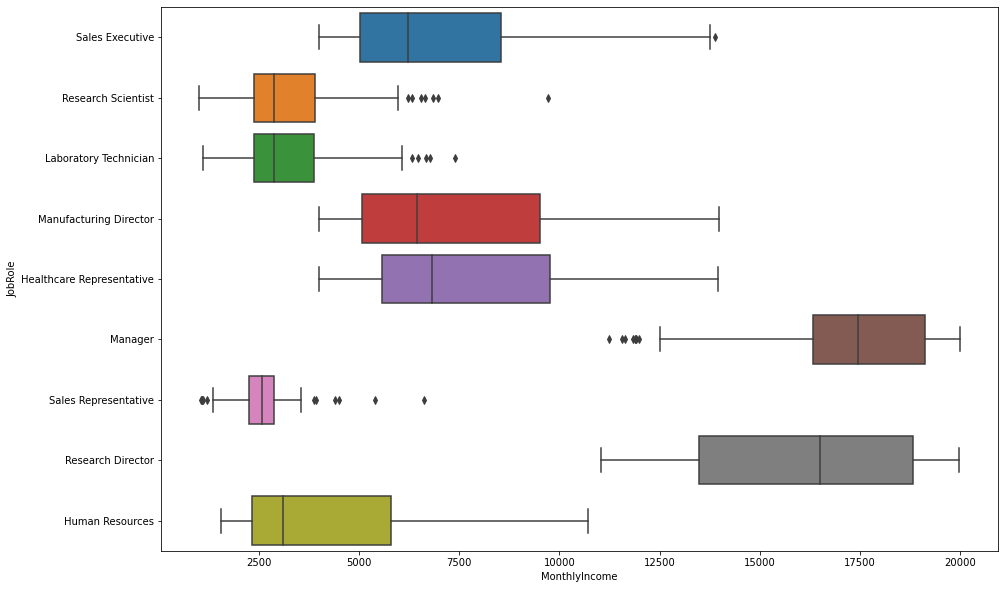

In [17]:
# Let's see the monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y = 'JobRole', data = employee_df)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

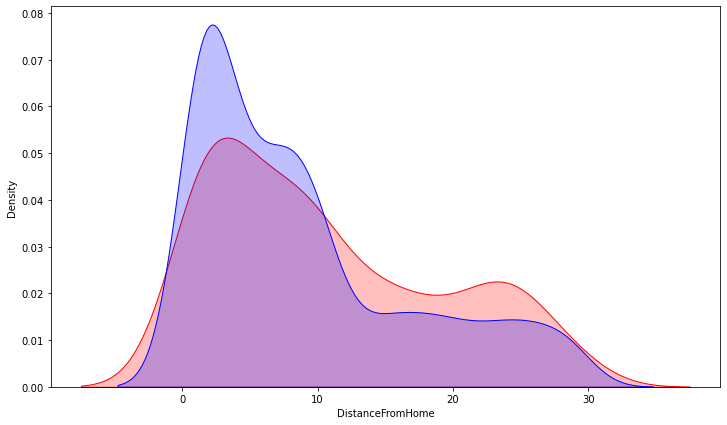

In [18]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Emploees Who Left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Emploees Who Stayed', shade = True, color = 'b')

Text(0.5, 0, 'Years With Current Manager')

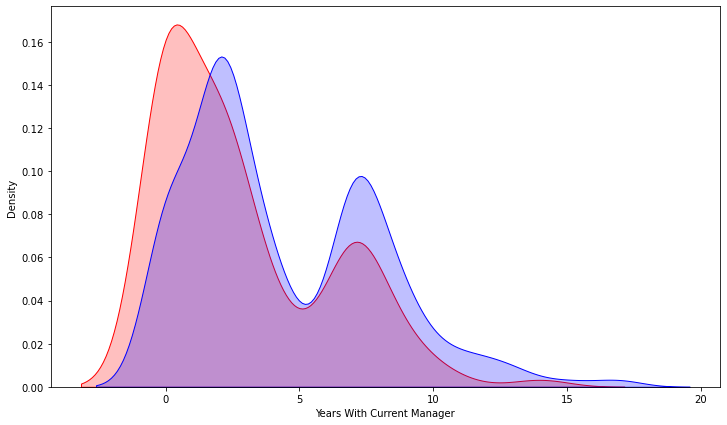

In [19]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

**MINI CHALLENGE #3:**
- **Plot the KDE for the total working years**
- **Compare between employees who left and stayed**

Text(0.5, 0, 'Total Working Years')

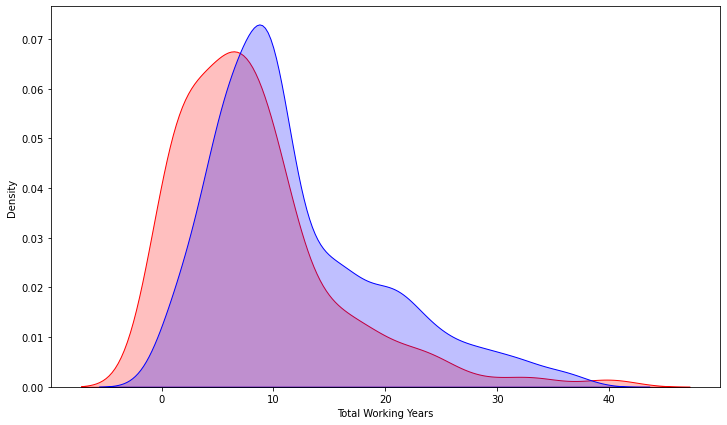

In [20]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Total Working Years')

# TASK #5: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [21]:
employee_df.head(3)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0

In [22]:
X_cat = employee_df[['BusinessTravel','Department', 'EducationField','Gender','JobRole','MaritalStatus']]
X_cat

BusinessTravel              Department    EducationField  Gender  \
0         Travel_Rarely                   Sales     Life Sciences  Female   
1     Travel_Frequently  Research & Development     Life Sciences    Male   
2         Travel_Rarely  Research & Development             Other    Male   
3     Travel_Frequently  Research & Development     Life Sciences  Female   
4         Travel_Rarely  Research & Development           Medical    Male   
5     Travel_Frequently  Research & Development     Life Sciences    Male   
6         Travel_Rarely  Research & Development           Medical  Female   
7         Travel_Rarely  Research & Development     Life Sciences    Male   
8     Travel_Frequently  Research & Development     Life Sciences    Male   
9         Travel_Rarely  Research & Development           Medical    Male   
10        Travel_Rarely  Research & Development           Medical    Male   
11        Travel_Rarely  Research & Development     Life Sciences  Female   
12        Travel_Rarely  Research & Development     Life Sciences    Male   
13        Travel_Rarely  Research & Development           Medical    Male   
14        Travel_Rarely  Research & Development     Life Sciences    Male   
15        Travel_Rarely  Research & Development     Life Sciences  Female   
16        Travel_Rarely  Research & Development     Life Sciences    Male   
17           Non-Travel  Research & Development           Medical    Male   
18        Travel_Rarely                   Sales     Life Sciences  Female   
19        Travel_Rarely  Research & Development     Life Sciences    Male   
20           Non-Travel  Research & Development             Other  Female   
21        Travel_Rarely                   Sales     Life Sciences    Male   
22        Travel_Rarely  Research & Development     Life Sciences  Female   
23        Travel_Rarely  Research & Development     Life Sciences    Male   
24        Travel_Rarely  Research & Development           Medical    Male   
25        Travel_Rarely  Research & Development             Other  Female   
26    Travel_Frequently  Research & Development     Life Sciences  Female   
27        Travel_Rarely                   Sales         Marketing    Male   
28        Travel_Rarely  Research & Development           Medical  Female   
29        Travel_Rarely                   Sales         Marketing  Female   
30        Travel_Rarely  Research & Development           Medical    Male   
31        Travel_Rarely  Research & Development             Other    Male   
32        Travel_Rarely  Research & Development           Medical    Male   
33        Travel_Rarely                   Sales  Technical Degree    Male   
34        Travel_Rarely  Research & Development           Medical    Male   
35        Travel_Rarely  Research & Development           Medical  Female   
36        Travel_Rarely                   Sales         Marketing    Male   
37        Travel_Rarely                   Sales         Marketing  Female   
38        Travel_Rarely  Research & Development     Life Sciences  Female   
39    Travel_Frequently                   Sales     Life Sciences  Female   
40        Travel_Rarely  Research & Development             Other    Male   
41        Travel_Rarely  Research & Development     Life Sciences  Female   
42        Travel_Rarely  Research & Development     Life Sciences    Male   
43    Travel_Frequently                   Sales     Life Sciences    Male   
44    Travel_Frequently  Research & Development           Medical  Female   
45        Travel_Rarely  Research & Development  Technical Degree  Female   
46           Non-Travel                   Sales         Marketing    Male   
47        Travel_Rarely  Research & Development     Life Sciences    Male   
48    Travel_Frequently                   Sales         Marketing    Male   
49        Travel_Rarely  Research & Development     Life Sciences    Male   
50        Travel_Rarely  Research & Development     Life Sciences    Male   
51   

In [23]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [24]:
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [25]:
X_cat.shape

(1470, 26)

In [26]:
X_cat = pd.DataFrame(X_cat)

In [27]:
X_cat 

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
5     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
6     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
7     0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
8     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
9     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
10    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
11    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
12    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
13    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
14    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
15    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
16    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
17    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
18    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
19    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
20    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
21    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
22    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
23    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
24    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
25    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
26    0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
27    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
28    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
29    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
30    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
31    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
32    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
33    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
34    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
35    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
36    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
37    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
38    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
39    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
40    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
41    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
42    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
43    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
44    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
45    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
46    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
47    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
48    0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
49    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
50    0.0  0.0  1.0  0.0  1.0

In [28]:
# note that we dropped the target 'Atrittion'
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X_numerical

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
5      32       1005                 2          2                        4   
6      59       1324                 3          3                        3   
7      30       1358                24          1                        4   
8      38        216                23          3                        4   
9      36       1299                27          3                        3   
10     35        809                16          3                        1   
11     29        153                15          2                        4   
12     31        670                26          1                        1   
13     34       1346                19          2                        2   
14     28        103                24          3                        3   
15     29       1389                21          4                        2   
16     32        334                 5          2                        1   
17     22       1123                16          2                        4   
18     53       1219                 2          4                        1   
19     38        371                 2          3                        4   
20     24        673                11          2                        1   
21     36       1218                 9          4                        3   
22     34        419                 7          4                        1   
23     21        391                15          2                        3   
24     34        699                 6          1                        2   
25     53       1282                 5          3                        3   
26     32       1125                16          1                        2   
27     42        691                 8          4                        3   
28     44        477                 7          4                        1   
29     46        705                 2          4                        2   
30     33        924                 2          3                        3   
31     44       1459                10          4                        4   
32     30        125                 9          2                        4   
33     39        895                 5          3                        4   
34     24        813                 1          3                        2   
35     43       1273                 2          2                        4   
36     50        869                 3          2                        1   
37     35        890                 2          3                        4   
38     36        852                 5          4                        2   
39     33       1141                 1          3                        3   
40     35        464                 4          2                        3   
41     27       1240                 2          4                        4   
42     26       1357                25          3                        1   
43     27        994                 8          3                        4   
44     30        721                 1          2                        3   
45     41       1360                12          3                        2   
46     34       1065                23          4                        2   
47     37        408                19          2                        2   
48     46       1211                 5          4                        1   
49     35       1229                 8          1                        4   
50     48        626        

In [29]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
5     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
6     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
7     0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
8     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
9     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
10    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
11    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
12    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
13    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
14    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
15    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
16    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
17    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
18    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
19    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
20    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
21    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
22    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
23    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
24    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
25    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
26    0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
27    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
28    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
29    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
30    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
31    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
32    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
33    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
34    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
35    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
36    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
37    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
38    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
39    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
40    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
41    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
42    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
43    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
44    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
45    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
46    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
47    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
48    0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
49    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
50    0.0  0.0  1.0  0.0  1.0 

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [32]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      1
35      0
36      1
37      0
38      0
39      0
40      0
41      0
42      1
43      0
44      0
45      1
46      0
47      0
48      0
49      0
50      1
51      1
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


**MINI CHALLENGE #4:**
- **What is the shape of the input and the output?**

In [33]:
print("X shape: "+ str(X.shape))
print("y shape: "+ str(y.shape))

X shape: (1470, 50)
y shape: (1470,)


# TASK #6: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS

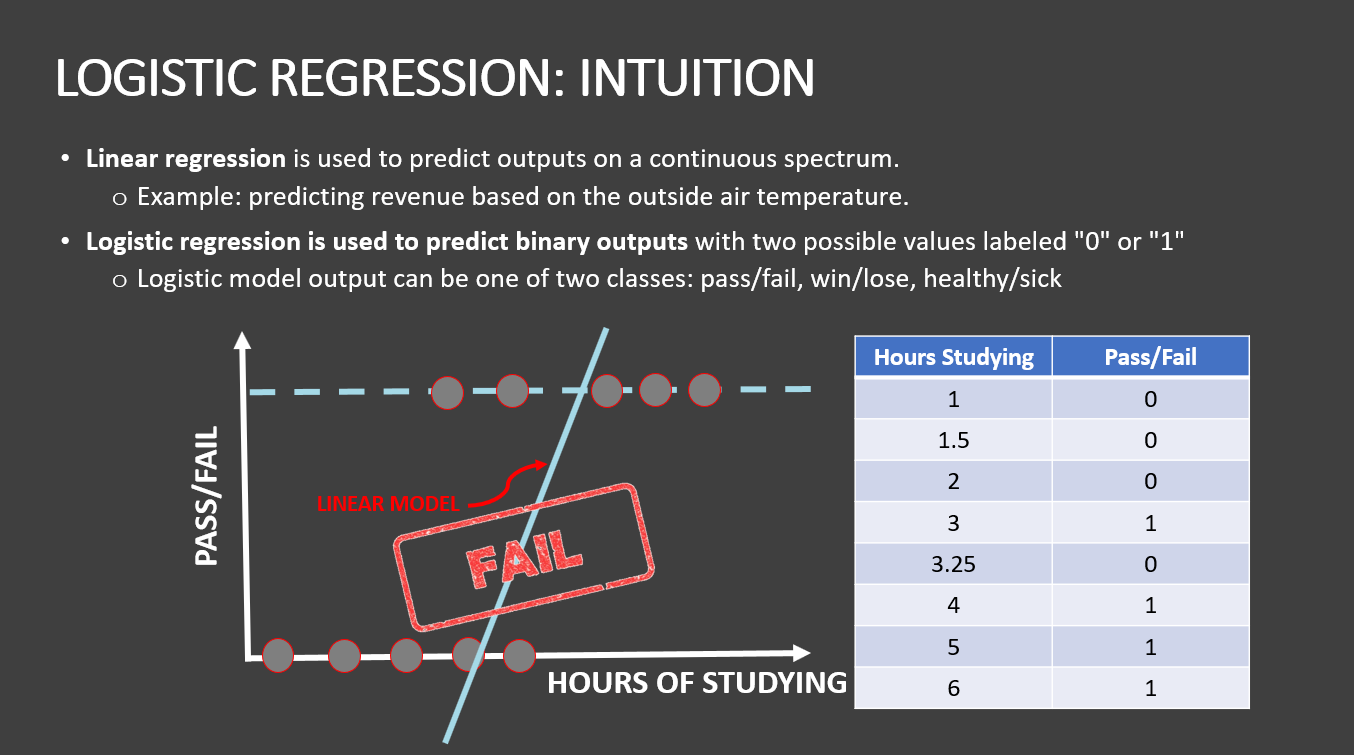

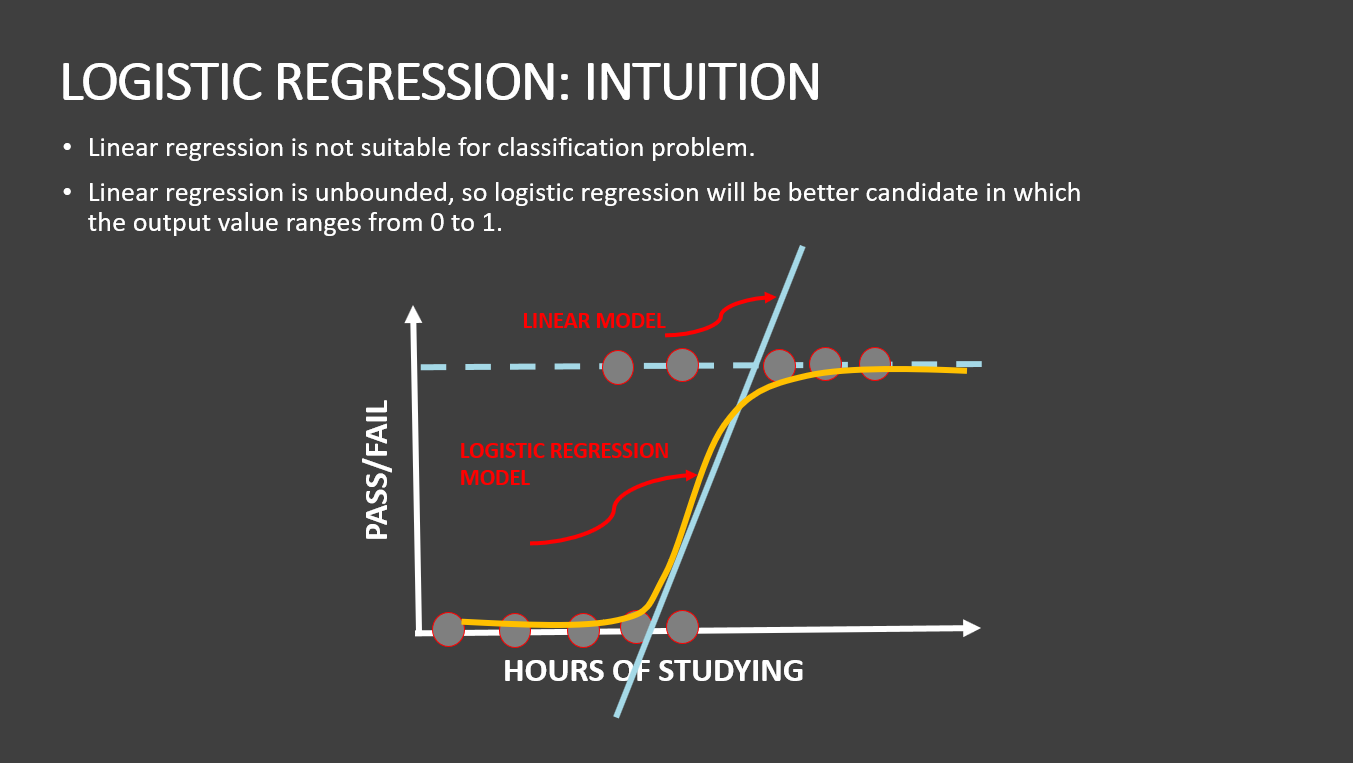

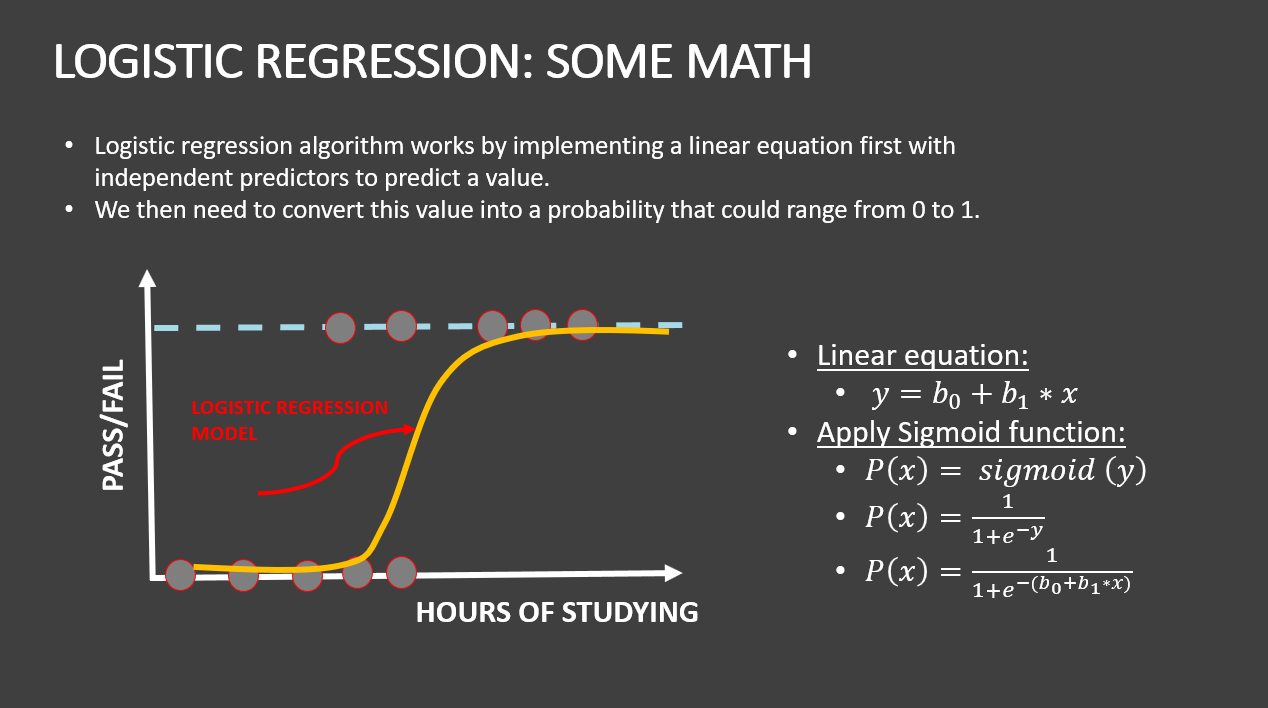

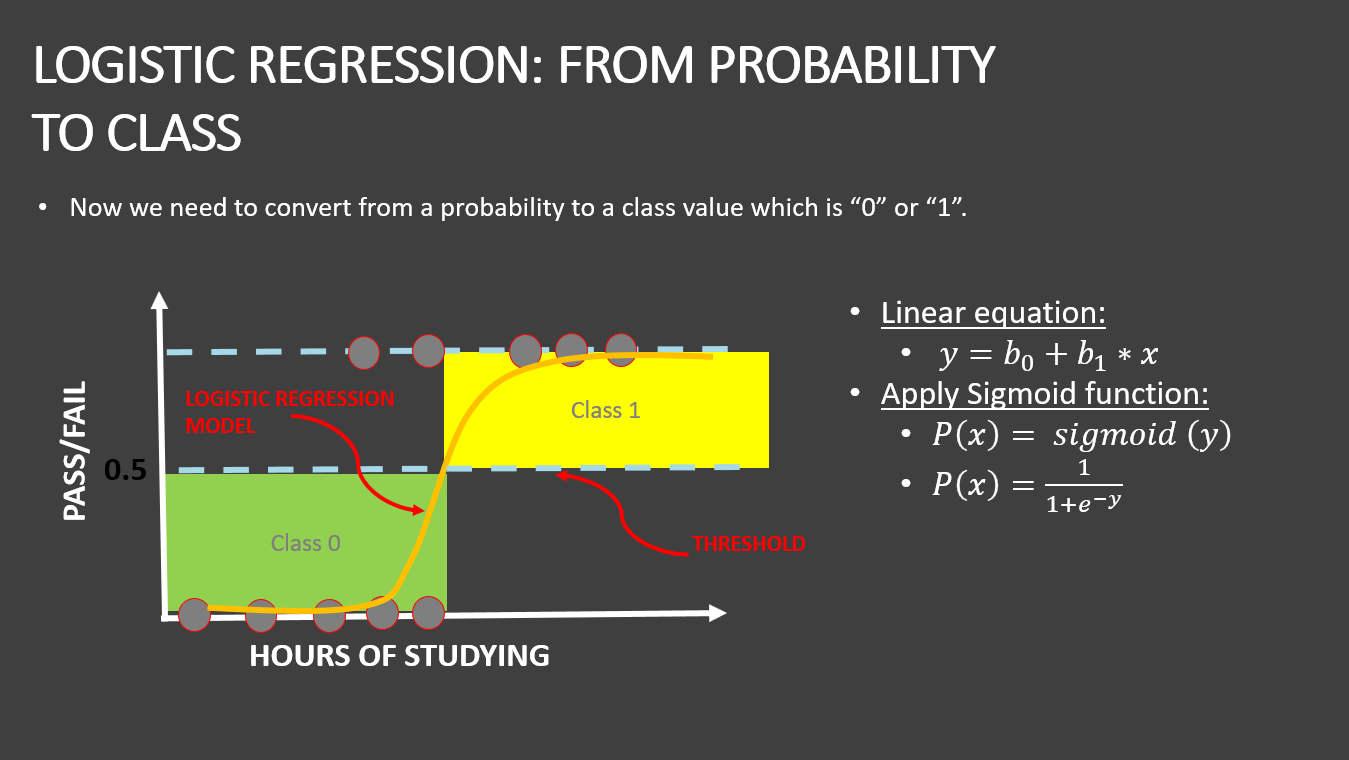

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [35]:
X_train.shape

(1102, 50)

In [36]:
X_test.shape

(368, 50)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [38]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))


Accuracy 86.95652173913044 %


<AxesSubplot:>

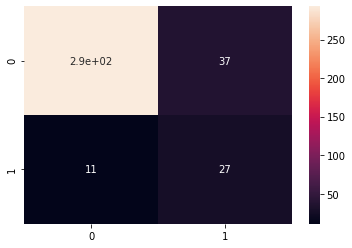

In [40]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       304
           1       0.71      0.42      0.53        64

    accuracy                           0.87       368
   macro avg       0.80      0.69      0.73       368
weighted avg       0.86      0.87      0.86       368



**MINI CHALLENGE #5:**
- **Train an XGboost algorithm instead of logistic regression**
- **Compare XGBoost model performance to Logistic Regression**

In [42]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[20:13:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

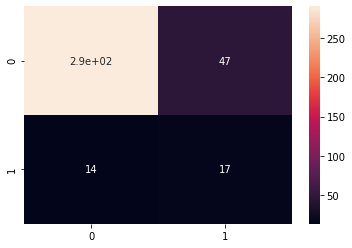

In [43]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       304
           1       0.55      0.27      0.36        64

    accuracy                           0.83       368
   macro avg       0.70      0.61      0.63       368
weighted avg       0.81      0.83      0.81       368

